Data set available at [this link](https://economistsview.typepad.com/economics421/files/Data-for-Problem-3.xls).

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Data-for-Problem-3.xls', usecols=[1,2])

In [3]:
data.head()

,SALARY,YEARS
0,105.2,36
1,91.3,30
2,72.5,29
3,74.3,28
4,103.5,26


Model: $\ln \textrm{Salary} = \beta_1 + \beta_2 \cdot \textrm{years} + \beta_3 \cdot \textrm{years}^2 + u_t$

Test for heteroskedasticity using: $|\hat u_i| = \sigma_i = \alpha_1 + \alpha_2 \textrm{years} + \alpha_3 \textrm{years}^2$

In [4]:
data['LOG_SALARY'] = data['SALARY'].apply(np.log)

In [5]:
data['YEARS_SQ'] = data['YEARS'].pow(2)

In [6]:
data.head()

,SALARY,YEARS,LOG_SALARY,YEARS_SQ
0,105.2,36,4.655863,1296
1,91.3,30,4.514151,900
2,72.5,29,4.283587,841
3,74.3,28,4.308111,784
4,103.5,26,4.639572,676


#### Regressing $y_i$ :

More on `LinearRegression` [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
linreg = LinearRegression()

In [9]:
X = data[['YEARS','YEARS_SQ']]
y = data['LOG_SALARY']

In [10]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print(linreg.intercept_, linreg.coef_)

3.8093653545744024 [ 0.04385284 -0.00062735]


In [12]:
y_hat = linreg.predict(data[['YEARS','YEARS_SQ']])

In [13]:
u_hat = y - y_hat

In [14]:
abs_u_hat = u_hat.abs()

#### Regressing $|\hat u_i| = \sigma_i$ :

In [15]:
lm_reg = LinearRegression()

In [16]:
lm_reg.fit(X,abs_u_hat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print(lm_reg.intercept_, lm_reg.coef_)

0.031202477190820144 [ 0.01439226 -0.00029753]


In [18]:
r_squared = lm_reg.score(X,abs_u_hat)

In [27]:
n, p_minus_one = X.shape # the constant term was not added to the X matrix!

In [20]:
lm_stats = n * r_squared

#### Finding the critical value:

More on `chi2` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html).

In [21]:
from scipy.stats import chi2

In [22]:
alpha = 0.05
df = p_minus_one

In [23]:
chi2_crit = chi2.ppf(q=1-alpha,df=df)

#### Hypothesis test:

In [24]:
if lm_stats > chi2_crit:
    print('REJECT NULL HYPOTHESIS! -> There is heteroskedasticity.')
else:
    print('Failed to reject the hull hypothesis.')

REJECT NULL HYPOTHESIS! -> There is heteroskedasticity.


Plotting the squared residuals:

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
u_hat_sq =  u_hat.pow(2)

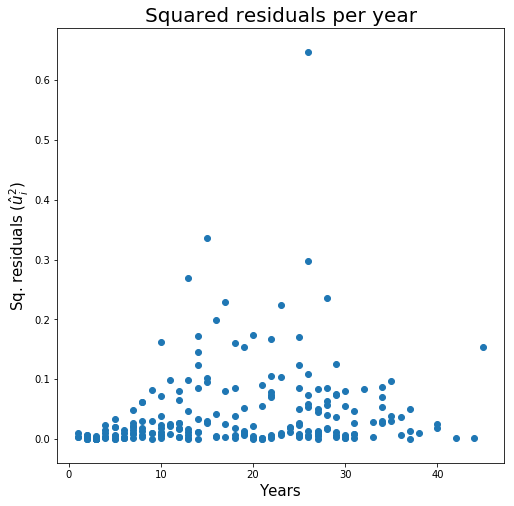

In [33]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data['YEARS'], u_hat_sq)

ax.set_title('Squared residuals per year', fontsize=20)
ax.set_xlabel('Years', fontsize=15)
ax.set_ylabel('Sq. residuals ($\hat u^2_i$)', fontsize=15)

plt.show()

The squared residuals seem to grow faster than quadratically: an exponential approach would probably fit better.

$\ln u^2_i = \alpha_1 + \alpha_2 \textrm{years} + \alpha_3 \textrm{years}^2$